<h1 style="text-align:center;font-size:30px;color:darkblue;">Model Implementation </h1>


## Imports


In [30]:
import numpy
from matplotlib import pyplot
import cv2
import os
import random
import joblib
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
import seaborn

## Configurations


In [3]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [4]:
Training_Data_Path="../Data/Main_Data/Training_Data/"
Testing_Data_Path="../Data/Main_Data/Testing_Data/"

In [24]:
def getClassificationEvaluation(actuals:list,predictions:list,labels:list):
    classification_data=confusion_matrix(
    actuals,
    predictions
    )
    seaborn.heatmap(classification_data,annot=True,xticklabels=labels, yticklabels=labels)
    pyplot.show()
    print(classification_report(actuals,predictions))

In [5]:
class_list=os.listdir(Training_Data_Path)

In [6]:
class_list

['digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [9]:
Object_Data_Path="../Data/Preprocessed_Data/"

In [18]:
pickle_training_features=open(Object_Data_Path+"pickle_training_features.pickle","rb")
Training_Features=pickle.load(pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Object_Data_Path+"pickle_training_labels.pickle","rb")
Training_Labels=pickle.load(pickle_training_labels)
pickle_training_labels.close()

In [19]:
pickle_testing_features=open(Object_Data_Path+"pickle_testing_features.pickle","rb")
Testing_Features=pickle.load(pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Object_Data_Path+"pickle_testing_labels.pickle","rb")
Testing_Labels=pickle.load(pickle_testing_labels)
pickle_testing_labels.close()

In [12]:
Training_Features.shape

(17000, 576)

In [15]:
Testing_Features.shape

(3000, 576)

# Model Definition


In [16]:
SVM_Model=SVC()

In [20]:
SVM_Model.fit(Training_Features,Training_Labels)

SVC()

## Evaluation


In [23]:
Training_Predictions=SVM_Model.predict(Training_Features)

In [22]:
Testing_Predictions=SVM_Model.predict(Testing_Features)

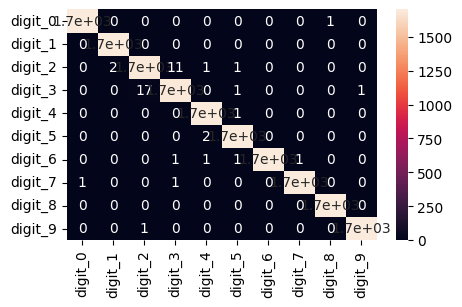

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1700
           1       1.00      1.00      1.00      1700
           2       0.99      0.99      0.99      1700
           3       0.99      0.99      0.99      1700
           4       1.00      1.00      1.00      1700
           5       1.00      1.00      1.00      1700
           6       1.00      1.00      1.00      1700
           7       1.00      1.00      1.00      1700
           8       1.00      1.00      1.00      1700
           9       1.00      1.00      1.00      1700

    accuracy                           1.00     17000
   macro avg       1.00      1.00      1.00     17000
weighted avg       1.00      1.00      1.00     17000



In [27]:
getClassificationEvaluation(Training_Labels,Training_Predictions,labels=class_list)

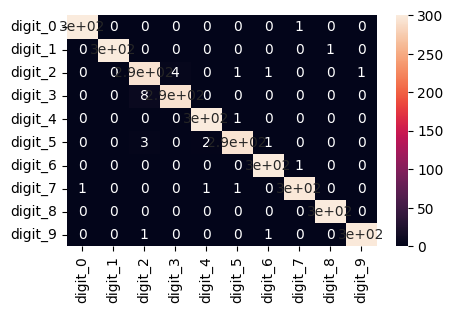

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.96      0.98      0.97       300
           3       0.99      0.97      0.98       300
           4       0.99      1.00      0.99       300
           5       0.99      0.98      0.98       300
           6       0.99      1.00      0.99       300
           7       0.99      0.99      0.99       300
           8       1.00      1.00      1.00       300
           9       1.00      0.99      0.99       300

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [28]:
getClassificationEvaluation(Testing_Labels,Testing_Predictions,labels=class_list)

In [32]:
joblib.dump(SVM_Model,"./Models/SVM_Model.joblib")

['./Models/SVM_Model.joblib']

# Model Saving


In [33]:
joblib.dump(SVM_Model,"../Model/SVM_Model.joblib")

['../Model/SVM_Model.joblib']